# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [5]:
from commonfunctions import *
from skimage.filters import gaussian
from scipy.signal import convolve2d
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

In [28]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('circuit.tif'))




In [ ]:
# 2. Custom Sobel (V-H-Both)





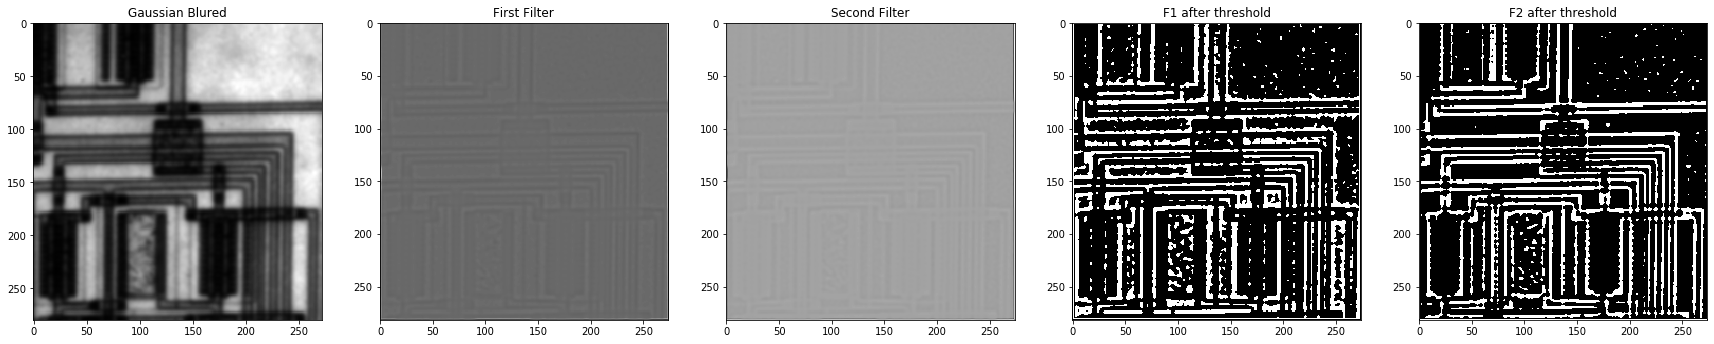

In [36]:
# 3. Custom LoG
thres= 20
img = rgb2gray(io.imread('circuit.tif'))

imgsArray = []
labelArray = []

# Applying gaussian filter
bluredImg = gaussian(img,1.5)

f1 = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

f2 = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

imgsArray.append(bluredImg)
labelArray.append("Gaussian Blured")

img_f1 = convolve2d(bluredImg,f1)
img_f2 = convolve2d(bluredImg,f2)

imgsArray.append(img_f1)
labelArray.append("First Filter")
imgsArray.append(img_f2)
labelArray.append("Second Filter")

img_f1_after_threshold = img_f1 > 0.03
img_f2_after_threshold = img_f2 > 0.01

imgsArray.append(img_f1_after_threshold)
labelArray.append("F1 after threshold")
imgsArray.append(img_f2_after_threshold)
labelArray.append("F2 after threshold")

show_images(imgsArray,labelArray)



In [ ]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''